<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_13904\894489609.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')


Dataset loaded.


[nltk_data] Downloading package punkt to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHAN SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_13904\894489609.py:39: MarkupResemblesLocatorWarning: The input l

NLTK data downloaded.


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.7362 - loss: 0.5379 - val_accuracy: 0.7796 - val_loss: 0.5167
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.8829 - loss: 0.2851 - val_accuracy: 0.7888 - val_loss: 0.5064
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 33s 203ms/step - accuracy: 0.9029 - loss: 0.2426 - val_accuracy: 0.8015 - val_loss: 0.4759
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9069 - loss: 0.2322 - val_accuracy: 0.8020 - val_loss: 0.5068
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.7750 - loss: 0.5074 - val_accuracy: 0.7517 - val_loss: 0.5211
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.8773 - loss: 0.3015 - val_accuracy: 0.8035 - val_loss: 0.4365
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - accuracy: 0.8982 - loss: 0.2522 - val_accuracy: 0.8494 - val_loss: 0.3577
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 31s

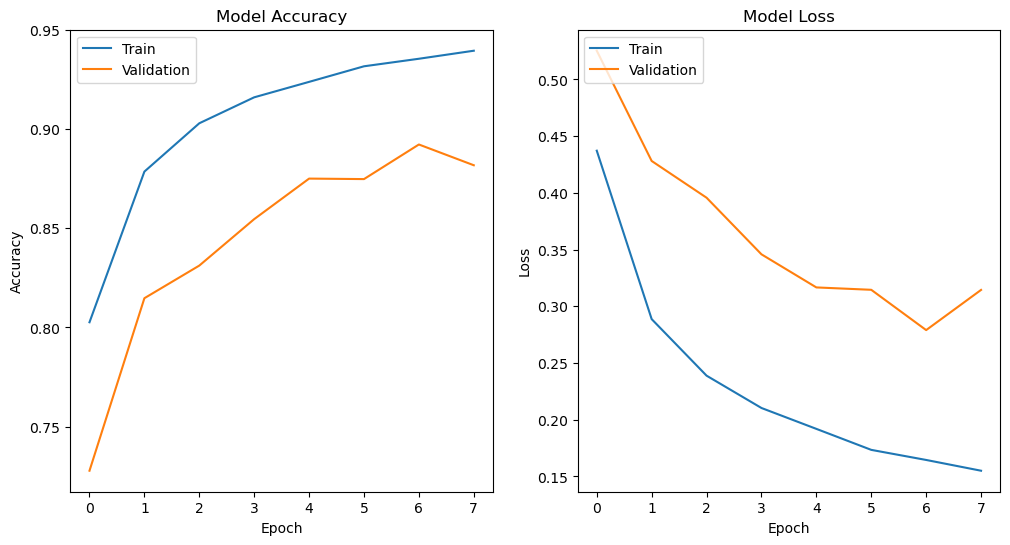

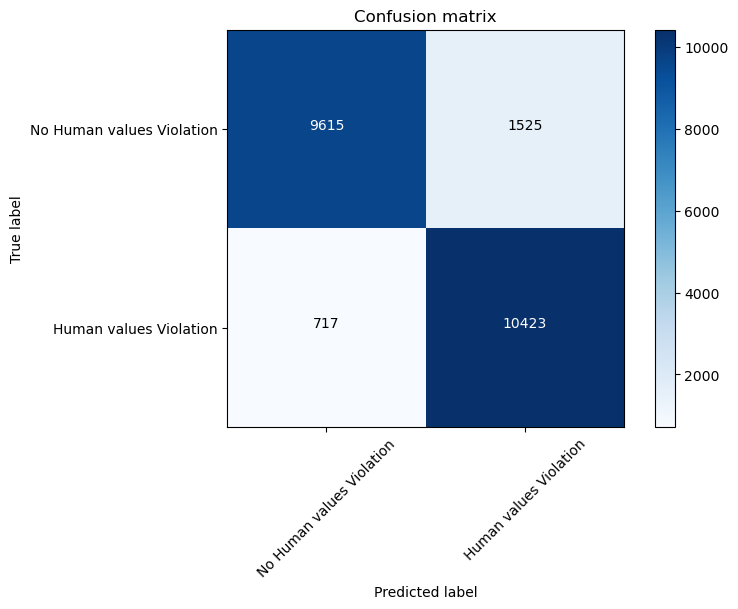

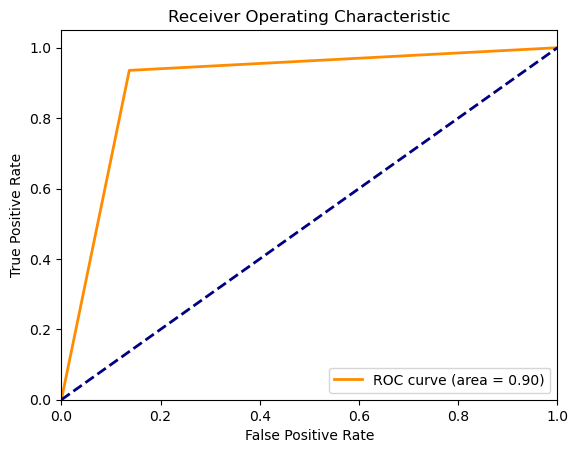

              precision    recall  f1-score   support

           0       0.93      0.86      0.90     11140
           1       0.87      0.94      0.90     11140

    accuracy                           0.90     22280
   macro avg       0.90      0.90      0.90     22280
weighted avg       0.90      0.90      0.90     22280



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('binaryclassificationdataset.csv', encoding='latin-1')
print("Dataset loaded.")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [entry.lower() for entry in dataset['comment_Text']]
dataset['comment_Text'] = [word_tokenize(entry) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_ValueViolation']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the LSTM model
def build_LSTM_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
lstm_model = build_LSTM_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = lstm_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = lstm_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))
    
    # Plot for model accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Plot for model loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Save the figure before showing
    plt.savefig('training_validation_loss_accuracy_lstm.png', dpi=300)
    
    plt.show()


plot_history(history)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))  # Optional: Define the figure size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix_lstm.png', dpi=300)  # Save the plot with 300 DPI
    plt.show()

# Example usage:
# plot_confusion_matrix(y_true, y_pred, classes=['Class 1', 'Class 2'], title='Confusion matrix')


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('ROC_curve.png', dpi=300)  # Save the plot with 300 DPI
    plt.show()

# Example usage:
# plot_roc_curve(y_true, y_pred_proba)


# Plot the confusion matrix and ROC curve
plot_confusion_matrix(all_actuals, all_predictions, classes=["No Human values Violation", "Human values Violation"])
plot_roc_curve(all_actuals, all_predictions)

# Print classification report
print(classification_report(all_actuals, all_predictions))


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8224\1333800619.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')


Dataset loaded.


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1000)>
[nltk_data] Downloading package wordnet to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHAN SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK data downloaded.


C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8224\1333800619.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 315ms/step - accuracy: 0.6723 - loss: 0.5869 - val_accuracy: 0.7373 - val_loss: 0.5415
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 260ms/step - accuracy: 0.8605 - loss: 0.3313 - val_accuracy: 0.8080 - val_loss: 0.4074
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 297ms/step - accuracy: 0.8820 - loss: 0.2904 - val_accuracy: 0.8056 - val_loss: 0.4237
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step - accuracy: 0.7341 - loss: 0.5538 - val_accuracy: 0.7155 - val_loss: 0.5958
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 297ms/step - accuracy: 0.8462 - loss: 0.3526 - val_accuracy: 0.7549 - val_loss: 0.5244
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.8835 - loss: 0.2840 - val_accuracy: 0.7990 - val_loss: 0.4333
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 37s 221ms/step - accuracy: 0.8919 - loss: 0.2649 - val_accuracy: 0.8318 - val_loss: 0.3975
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 31s

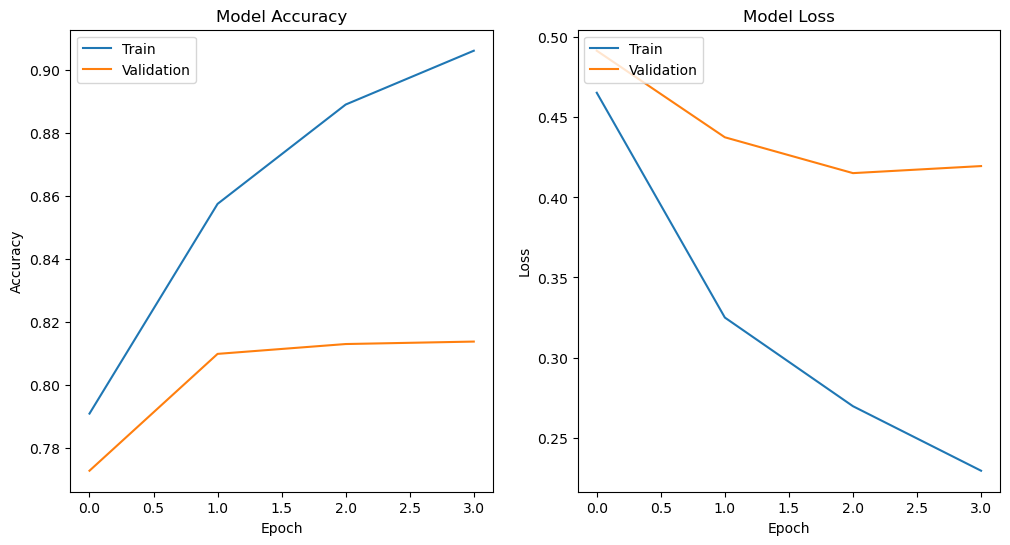

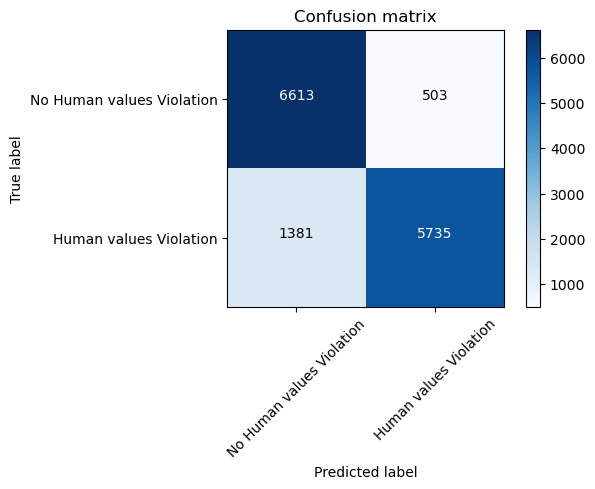

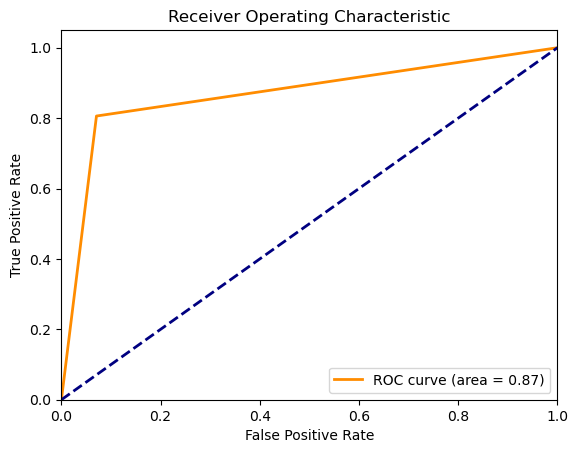

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7116
           1       0.92      0.81      0.86      7116

    accuracy                           0.87     14232
   macro avg       0.87      0.87      0.87     14232
weighted avg       0.87      0.87      0.87     14232



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('binaryclassificationdataset.csv', encoding='latin-1')
print("Dataset loaded.")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [entry.lower() for entry in dataset['comment_Text']]
dataset['comment_Text'] = [word_tokenize(entry) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# Apply undersampling to balance the classes
X = dataset['text_final']
y = dataset['Have_ValueViolation']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the LSTM model
def build_LSTM_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
lstm_model = build_LSTM_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = lstm_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = lstm_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot the confusion matrix and ROC curve
plot_confusion_matrix(all_actuals, all_predictions, classes=["No Human values Violation", "Human values Violation"])
plot_roc_curve(all_actuals, all_predictions)

# Print classification report
print(classification_report(all_actuals, all_predictions))


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8224\1850736035.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')


Dataset loaded.


[nltk_data] Downloading package punkt to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHAN SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8224\1850736035.py:39: MarkupResemblesLocatorWarning: The input l

NLTK data downloaded.


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.7248 - loss: 0.5368 - val_accuracy: 0.7908 - val_loss: 0.4630
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 237ms/step - accuracy: 0.8851 - loss: 0.2855 - val_accuracy: 0.8207 - val_loss: 0.4208
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 52s 308ms/step - accuracy: 0.9019 - loss: 0.2427 - val_accuracy: 0.8290 - val_loss: 0.4267
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 60s 333ms/step - accuracy: 0.7331 - loss: 0.5312 - val_accuracy: 0.7622 - val_loss: 0.5539
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 314ms/step - accuracy: 0.8817 - loss: 0.2841 - val_accuracy: 0.8125 - val_loss: 0.4706
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 55s 342ms/step - accuracy: 0.9002 - loss: 0.2459 - val_accuracy: 0.8579 - val_loss: 0.3837
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 69s 258ms/step - accuracy: 0.9070 - loss: 0.2312 - val_accuracy: 0.8330 - val_loss: 0.4299
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step - accuracy: 0.7383 - loss: 0.5326 - val_accuracy: 0.8155 - val_loss: 0.4481
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 289ms/step - accuracy: 0.8816 - loss: 0.2849 - val_accuracy: 0.8364 - val_loss: 0.4056
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 276ms/step - accuracy: 0.8984 - loss: 0.2501 - val_accuracy: 0.8444 - val_loss: 0.4054
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 48s 296ms/step - accuracy: 0.9087 - loss: 0.2326 - val_accuracy: 0.8444 - val_loss: 0.4310
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 275ms/step - accuracy: 0.7270 - loss: 0.5407 - val_accuracy: 0.7911 - val_loss: 0.4887
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 276ms/step - accuracy: 0.8821 - loss: 0.2832 - val_accuracy: 0.8145 - val_loss: 0.4664
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 271ms/step - accuracy: 0.9016 - loss: 0.2445 - val_accuracy: 0.8285 - val_loss: 0.4441
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 281ms/step - accuracy: 0.9074 - loss: 0.2381 - val_accuracy: 0.8449 - val_loss: 0.4148
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 271ms/step - accuracy: 0.9098 - loss: 0.2228 - val_accuracy: 0.8417 - val_loss: 0.3917
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - accuracy: 0.9183 - loss: 0.2116 - val_accuracy: 0.8751 - val_loss: 0.3568
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 288ms/step - accuracy: 0.9244 - loss: 0.2002 - val_accuracy: 0.8806 - val_loss: 0.3060
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 284ms/step - accuracy: 0.9217 - loss: 0.1990 - val

C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 255ms/step - accuracy: 0.7362 - loss: 0.5290 - val_accuracy: 0.8153 - val_loss: 0.4711
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - accuracy: 0.8874 - loss: 0.2822 - val_accuracy: 0.8065 - val_loss: 0.4826
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 48s 262ms/step - accuracy: 0.7332 - loss: 0.5397 - val_accuracy: 0.7759 - val_loss: 0.4785
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 280ms/step - accuracy: 0.8821 - loss: 0.2850 - val_accuracy: 0.8123 - val_loss: 0.4696
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 87s 308ms/step - accuracy: 0.9033 - loss: 0.2488 - val_accuracy: 0.8195 - val_loss: 0.4267
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 80s 293ms/step - accuracy: 0.9105 - loss: 0.2300 - val_accuracy: 0.8155 - val_loss: 0.4356
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 49s 268ms/step - accuracy: 0.7293 - loss: 0.5397 - val_accuracy: 0.7896 - val_loss: 0.4964
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 270ms/step - accuracy: 0.8876 - loss: 0.2818 - val_accuracy: 0.8133 - val_loss: 0.4767
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 277ms/step - accuracy: 0.8994 - loss: 0.2511 - val_accuracy: 0.8237 - val_loss: 0.4349
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 281ms/step - accuracy: 0.9071 - loss: 0.2371 - val_accuracy: 0.8397 - val_loss: 0.4291
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 291ms/step - accuracy: 0.9064 - loss: 0.2361 - val_accuracy: 0.8315 - val_loss: 0.4321
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 54s 286ms/step - accuracy: 0.7242 - loss: 0.5355 - val_accuracy: 0.7961 - val_loss: 0.5060
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 292ms/step - accuracy: 0.8864 - loss: 0.2796 - val_accuracy: 0.8270 - val_loss: 0.4481
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.9018 - loss: 0.2418 - val_accuracy: 0.8332 - val_loss: 0.4426
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 293ms/step - accuracy: 0.9077 - loss: 0.2342 - val_accuracy: 0.8532 - val_loss: 0.3777
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 258ms/step - accuracy: 0.9128 - loss: 0.2201 - val_accuracy: 0.8073 - val_loss: 0.5035
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 52s 274ms/step - accuracy: 0.7323 - loss: 0.5350 - val_accuracy: 0.7574 - val_loss: 0.5265
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 258ms/step - accuracy: 0.8829 - loss: 0.2787 - val_accuracy: 0.8409 - val_loss: 0.3968
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 294ms/step - accuracy: 0.8989 - loss: 0.2469 - val_accuracy: 0.7873 - val_loss: 0.5494
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 58s 300ms/step - accuracy: 0.7335 - loss: 0.5339 - val_accuracy: 0.7552 - val_loss: 0.5334
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.8871 - loss: 0.2720 - val_accuracy: 0.8340 - val_loss: 0.4361
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 47s 289ms/step - accuracy: 0.9009 - loss: 0.2470 - val_accuracy: 0.8626 - val_loss: 0.3640
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 273ms/step - accuracy: 0.9040 - loss: 0.2384 - val_accuracy: 0.8315 - val_loss: 0.4139
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


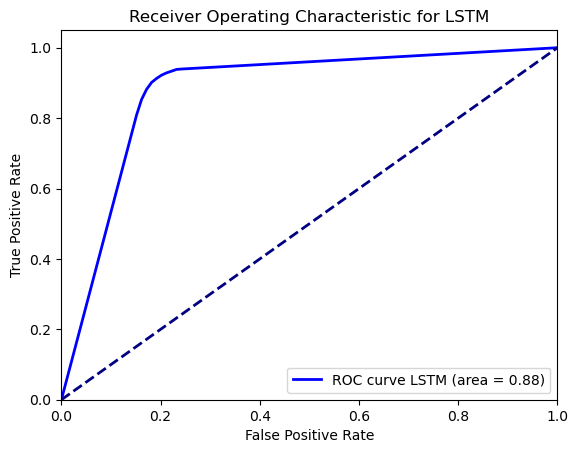

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     11140
           1       0.84      0.93      0.88     11140

    accuracy                           0.88     22280
   macro avg       0.88      0.88      0.88     22280
weighted avg       0.88      0.88      0.88     22280



In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('binaryclassificationdataset.csv', encoding='latin-1')
print("Dataset loaded.")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [entry.lower() for entry in dataset['comment_Text']]
dataset['comment_Text'] = [word_tokenize(entry) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_ValueViolation']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the LSTM model
def build_LSTM_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
lstm_model = build_LSTM_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predicted_targets = []
    all_actual_targets = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Compile and train the model
        model = build_LSTM_model()
        model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Evaluate the model
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = model.predict(test_sequences_matrix).round().flatten()

        # ROC Curve
        fpr, tpr, _ = roc_curve(Test_Y, predictions)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        
        # Store actual and predicted values
        all_predicted_targets.extend(predictions)
        all_actual_targets.extend(Test_Y)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return mean_fpr, mean_tpr, mean_auc, all_predicted_targets, all_actual_targets

# Get ROC data
mean_fpr_lstm, mean_tpr_lstm, mean_auc_lstm, all_predictions_lstm, all_actuals_lstm = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot ROC Curve
plt.figure()
plt.plot(mean_fpr_lstm, mean_tpr_lstm, color='blue', lw=2, label='ROC curve LSTM (area = %0.2f)' % mean_auc_lstm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print(classification_report(all_actuals_lstm, all_predictions_lstm))


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('binaryclassificationdataset.csv', encoding='latin-1')
print("Dataset loaded.")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['comment_Text'] = dataset['comment_Text'].apply(clean_text)
dataset['comment_Text'].dropna(inplace=True)
dataset['comment_Text'] = [entry.lower() for entry in dataset['comment_Text']]
dataset['comment_Text'] = [word_tokenize(entry) for entry in dataset['comment_Text']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['comment_Text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_ValueViolation'] = dataset['Have_ValueViolation'].map({'Yes': 1, 'No': 0})

# Apply undersampling to balance the classes
X = dataset['text_final']
y = dataset['Have_ValueViolation']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the LSTM model
def build_LSTM_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
lstm_model = build_LSTM_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predicted_targets = []
    all_actual_targets = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Compile and train the model
        model = build_LSTM_model()
        model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Evaluate the model
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = model.predict(test_sequences_matrix).round().flatten()

        # ROC Curve
        fpr, tpr, _ = roc_curve(Test_Y, predictions)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        
        # Store actual and predicted values
        all_predicted_targets.extend(predictions)
        all_actual_targets.extend(Test_Y)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return mean_fpr, mean_tpr, mean_auc, all_predicted_targets, all_actual_targets

# Get ROC data
mean_fpr_lstm_under, mean_tpr_lstm_under, mean_auc_lstm_under, all_predictions_lstm_under, all_actuals_lstm_under = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Print classification report
print(classification_report(all_actuals_lstm_under, all_predictions_lstm_under))


Dataset loaded.
NLTK data downloaded.


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
C:\Users\KHAN SHAHFAHAD\AppData\Local\Temp\ipykernel_8224\1231398152.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Downloading package punkt to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHAN SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KHAN
[nltk_data]     SHAHFAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[n

Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 384ms/step - accuracy: 0.6857 - loss: 0.5831 - val_accuracy: 0.7311 - val_loss: 0.5251
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 502ms/step - accuracy: 0.8582 - loss: 0.3314 - val_accuracy: 0.7892 - val_loss: 0.4557
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 98s 648ms/step - accuracy: 0.8904 - loss: 0.2698 - val_accuracy: 0.8302 - val_loss: 0.3665
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 547ms/step - accuracy: 0.6802 - loss: 0.5860 - val_accuracy: 0.7611 - val_loss: 0.5131
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 51s 494ms/step - accuracy: 0.8613 - loss: 0.3233 - val_accuracy: 0.8029 - val_loss: 0.4289
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 541ms/step - accuracy: 0.8942 - loss: 0.2624 - val_accuracy: 0.8208 - val_loss: 0.4107
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 525ms/step - accuracy: 0.9052 - loss: 0.2451 - val_accuracy: 0.8462 - val_loss: 0.3510
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 504ms/step - accuracy: 0.9094 - loss: 0.2268 - val

C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 536ms/step - accuracy: 0.6821 - loss: 0.5749 - val_accuracy: 0.7416 - val_loss: 0.5166
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 53s 510ms/step - accuracy: 0.9021 - loss: 0.2510 - val_accuracy: 0.8220 - val_loss: 0.3913
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 55s 536ms/step - accuracy: 0.9033 - loss: 0.2357 - val_accuracy: 0.8263 - val_loss: 0.3938
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 87s 534ms/step - accuracy: 0.6852 - loss: 0.5776 - val_accuracy: 0.7006 - val_loss: 0.5675
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/stepep - accuracy: 0.8642 - loss: 


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 74s 432ms/step - accuracy: 0.6840 - loss: 0.5787 - val_accuracy: 0.7486 - val_loss: 0.5246
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 424ms/step - accuracy: 0.8624 - loss: 0.3246 - val_accuracy: 0.8392 - val_loss: 0.3764
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 343ms/step - accuracy: 0.8891 - loss: 0.2743 - val_accuracy: 0.8169 - val_loss: 0.4038
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 68s 495ms/step - accuracy: 0.6753 - loss: 0.5862 - val_accuracy: 0.7576 - val_loss: 0.5015
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.8558 - loss: 0.3307 - val_accuracy: 0.8407 - val_loss: 0.3710
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 51s 483ms/step - accuracy: 0.8910 - loss: 0.2599 - val_accuracy: 0.8232 - val_loss: 0.3979
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 67s 540ms/step - accuracy: 0.6773 - loss: 0.5749 - val_accuracy: 0.7319 - val_loss: 0.5224
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 433ms/step - accuracy: 0.8695 - loss: 0.3078 - val_accuracy: 0.7892 - val_loss: 0.4649
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 38s 367ms/step - accuracy: 0.9001 - loss: 0.2639 - val_accuracy: 0.8521 - val_loss: 0.3537
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 46s 414ms/step - accuracy: 0.9082 - loss: 0.2377 - val_accuracy: 0.8130 - val_loss: 0.4313
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 49s 352ms/step - accuracy: 0.6834 - loss: 0.5847 - val_accuracy: 0.8173 - val_loss: 0.3867
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 380ms/step - accuracy: 0.8636 - loss: 0.3188 - val_accuracy: 0.7877 - val_loss: 0.4802
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - accuracy: 0.6810 - loss: 0.5823 - val_accuracy: 0.7311 - val_loss: 0.5222
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 266ms/step - accuracy: 0.8653 - loss: 0.3263 - val_accuracy: 0.8158 - val_loss: 0.4056
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 248ms/step - accuracy: 0.8987 - loss: 0.2619 - val_accuracy: 0.8368 - val_loss: 0.3626
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9001 - loss: 0.2531 - val_accuracy: 0.8142 - val_loss: 0.4206
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
Epoch 1/10


C:\Users\KHAN SHAHFAHAD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - accuracy: 0.6842 - loss: 0.5817 - val_accuracy: 0.7381 - val_loss: 0.5388
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.8621 - loss: 0.3225 - val_accuracy: 0.8029 - val_loss: 0.4344
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.8874 - loss: 0.2733 - val_accuracy: 0.7923 - val_loss: 0.4644
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7116
           1       0.91      0.81      0.86      7116

    accuracy                           0.86     14232
   macro avg       0.87      0.86      0.86     14232
weighted avg       0.87      0.86      0.86     14232



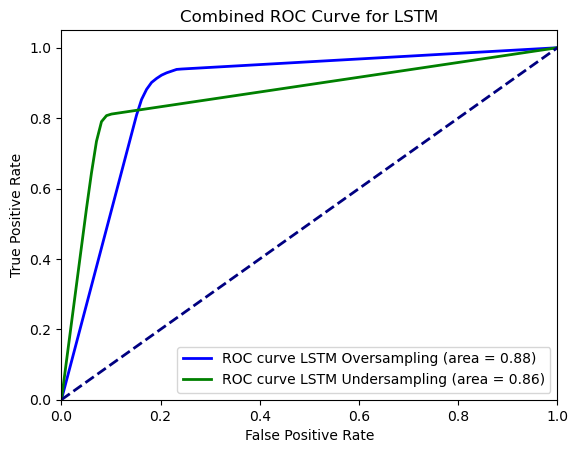

In [11]:
# Plot Combined ROC Curve
plt.figure()
plt.plot(mean_fpr_lstm, mean_tpr_lstm, color='blue', lw=2, label='ROC curve LSTM Oversampling (area = %0.2f)' % mean_auc_lstm)
plt.plot(mean_fpr_lstm_under, mean_tpr_lstm_under, color='green', lw=2, label='ROC curve LSTM Undersampling (area = %0.2f)' % mean_auc_lstm_under)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for LSTM')
plt.legend(loc="lower right")
plt.show()


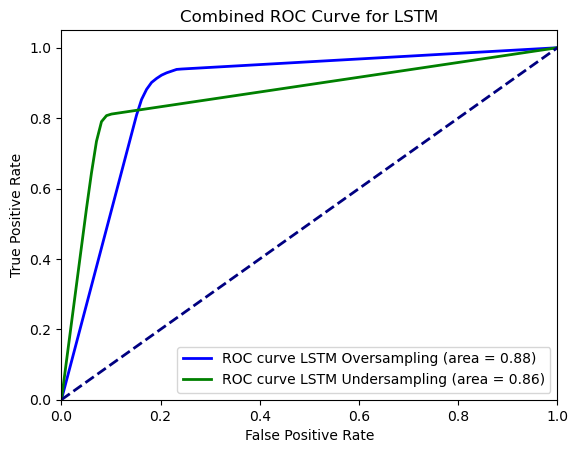

In [12]:
import matplotlib.pyplot as plt
# Plot Combined ROC Curve
plt.figure()
plt.plot(mean_fpr_lstm, mean_tpr_lstm, color='blue', lw=2, label='ROC curve LSTM Oversampling (area = %0.2f)' % mean_auc_lstm)
plt.plot(mean_fpr_lstm_under, mean_tpr_lstm_under, color='green', lw=2, label='ROC curve LSTM Undersampling (area = %0.2f)' % mean_auc_lstm_under)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for LSTM')
plt.legend(loc="lower right")
# Save the plot
plt.savefig('combined_roc_curve_lstm.png', dpi=300)
plt.show()